In [1]:
contractions = { 
"ain't": "am not",
"aren't": "am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"coz": "because",
"&": "and"
}

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re

In [3]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [6]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [7]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [9]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=2)

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [11]:
from spacy.lang.en.stop_words import STOP_WORDS

In [12]:
data = pd.read_csv("identify_sentiment_train.csv")[["tweet", "label"]]

In [13]:
data.head()

,tweet,label
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,0
1,Finally a transparant silicon case ^^ Thanks t...,0
2,We love this! Would you go? #talk #makememorie...,0
3,I'm wired I know I'm George I was made that wa...,0
4,What amazing service! Apple won't even talk to...,1


In [14]:
data.isnull().sum()

tweet    0
label    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   7920 non-null   object
 1   label   7920 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.9+ KB


In [16]:
positive_sentiment = data[data["label"] == 0]["tweet"]
negative_sentiment = data[data["label"] == 1]["tweet"]

In [17]:
random.seed(8)
random_index = random.sample(range(len(positive_sentiment)), 5)
for index in random_index:
    print(positive_sentiment.iloc[index])
    print("*"*50)

iPhone X #iPhoneX #NewPhone #MerryChristmas #Pasko #PaskoNa #Masaya #Hello2018 #256GB https://www.instagram.com/p/Bct3EMkH4RO/
**************************************************
Just ordered this #amazing #photo as my #new #iphone case! Got so much for this #photographer… http://instagram.com/p/YSj7jxMRv7/
**************************************************
In wif the mid-valley newly reno #topshop! well done! #instagram #cool #iphoneonly #iphone #instadail http://instagr.am/p/JsEEVvKkUg/
**************************************************
This view . . . #travel #traveldiaries #travelphotography #travelgram #travelling #travelphoto #travelworld #world #vacation #break #work #lifestyle #change #worklifebalance #product #designer #remote #job #saas #remotework #apple #macbook #workspacepic.twitter.com/jD5YjEFmmg
**************************************************
High way cafe...... #shoutouts #indian #malayali #fun #tbt #tbs #tagging #photography #iphone… http://instagram.com/p/w8mH4jPAj

In [18]:
random.seed(5)
random_index = random.sample(range(len(negative_sentiment)), 5)
for index in random_index:
    print(negative_sentiment.iloc[index])
    print("*"*50)
random_index

No phone signal, Internet or wifi... Steve jobs must be haunting me for owning a pc!
**************************************************
@Vivo_India @UnboxTherapy Scamsters! Advertised a sale. Site went down 10 min's before the sale. Came back up & all gone. http://www.isitdownrightnow.com reported site down for 10 mins. #vivofrauds #vivoscamsters
**************************************************
Soft grip #Battery #case for #iPhone 4 PowerPlus II Perfect #case fits snugly #distributors @AndinoBrand http://twitpic.com/3vsjm7
**************************************************
So The Update Got Rid Of My Photos In My Camera Roll #Apple
**************************************************
All I ask for is not to have my digital camera's flash stop working when I need my cam this weekend!! Urgh. #sony #cybershot
**************************************************


[1275, 523, 1519, 734, 1628]

### Vulgar words

In [19]:
from collections import Counter
counter = Counter(" ".join(negative_sentiment).split())

In [20]:
term_count = pd.DataFrame(counter.most_common(), columns=["terms", "counts"])

In [21]:
term_count["terms"] = term_count["terms"].apply(lambda term: re.sub("[^\w\s]", " ", term))
term_count["terms"] = term_count["terms"].apply(lambda term: term.lower())
term_count["terms"] = term_count["terms"].apply(lambda term: "".join(term.split()))

In [22]:
term_count["sentiment"] = term_count["terms"].apply(lambda t: \
                                                   sid.polarity_scores(t)["compound"])

In [23]:
vulgar_words = term_count[term_count["sentiment"] < 0]["terms"].unique()

### Label (target variable)

In [24]:
data["label"].value_counts()

0    5894
1    2026
Name: label, dtype: int64

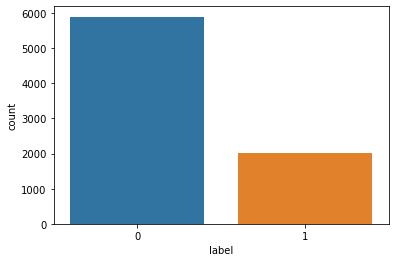

In [25]:
sns.countplot(data["label"])

### Word Count 

In [26]:
data["word_count"] = data["tweet"].apply(lambda tweet: len(tweet.split()))

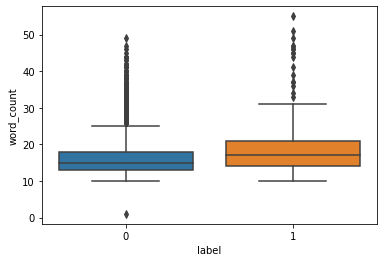

In [27]:
sns.boxplot(data["label"], data["word_count"])

In [28]:
data["word_count"].describe()

count    7920.000000
mean       16.843434
std         5.489890
min         1.000000
25%        13.000000
50%        15.000000
75%        19.000000
max        55.000000
Name: word_count, dtype: float64

### Character Count

In [29]:
data["charcter_count"] = data["tweet"].apply(lambda tweet: \
                        np.array([len(word) for word in tweet.split()]).sum())

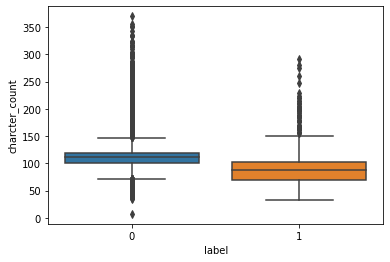

In [30]:
sns.boxplot(data["label"], data["charcter_count"])

In [31]:
data["charcter_count"].describe()

count    7920.000000
mean      113.076263
std        45.157979
min         7.000000
25%        90.000000
50%       108.000000
75%       117.000000
max       370.000000
Name: charcter_count, dtype: float64

### Hastag Counts

In [32]:
data["hashtag_count"] = data["tweet"].apply(lambda tweet: len(re.findall("(#)", tweet)))

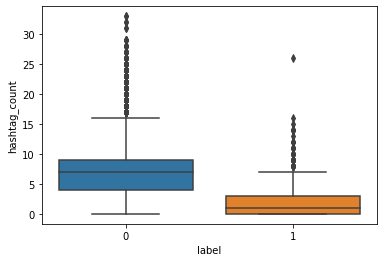

In [33]:
sns.boxplot(data["label"], data["hashtag_count"])

In [34]:
data["hashtag_count"].describe()

count    7920.000000
mean        6.015657
std         4.969970
min         0.000000
25%         2.000000
50%         6.000000
75%         9.000000
max        33.000000
Name: hashtag_count, dtype: float64

### Vulgar word counts

In [35]:
def vulgar_words_count(tweet):
    new_token_list = []
    for word in vulgar_words:
        if word in tweet:
            new_token_list.append(word)
    return len(new_token_list)

In [36]:
data["vulgar_word_count"] = data["tweet"].apply(vulgar_words_count)

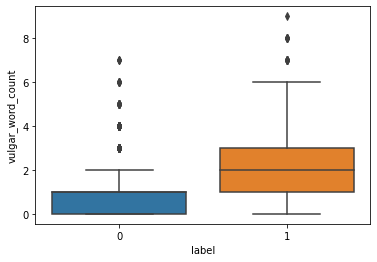

In [37]:
sns.boxplot(data["label"], data["vulgar_word_count"])

### Highlight vulguar words present in #

In [38]:
def find_vulgar_words(tweet):
    new_tokens = " "
    hashtag_words = " ".join([word for word in tweet.split() if word.startswith("#")])
    for word in vulgar_words:
        if word in hashtag_words:
            new_tokens += (word + " ")
    return new_tokens

In [39]:
data["tweet"] += data["tweet"].apply(find_vulgar_words)

In [40]:
data.head()

,tweet,label,word_count,charcter_count,hashtag_count,vulgar_word_count
0,#fingerprint #Pregnancy Test https://goo.gl/h1...,0,13,116,11,1
1,Finally a transparant silicon case ^^ Thanks t...,0,17,115,5,1
2,We love this! Would you go? #talk #makememorie...,0,15,109,8,0
3,I'm wired I know I'm George I was made that wa...,0,17,96,4,3
4,What amazing service! Apple won't even talk to...,1,23,102,0,2


### Mention Counts

### URL Count

### Special symbol counts

In [41]:
data["symbol_count"] = data["tweet"].apply(lambda tweet: \
        len([word for word in tweet.split() if not(word.isalpha() and word.isdigit())]))

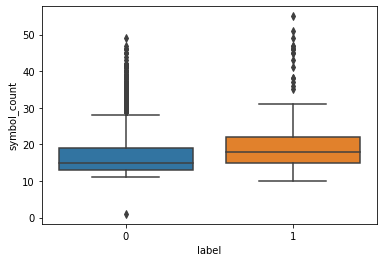

In [42]:
sns.boxplot(data["label"], data["symbol_count"])

In [43]:
data["symbol_count"].describe()

count    7920.000000
mean       17.298106
std         5.612044
min         1.000000
25%        13.000000
50%        16.000000
75%        19.000000
max        55.000000
Name: symbol_count, dtype: float64

### Stop word Counts

In [44]:
data["stop_word_count"] = data["tweet"].apply(lambda tweet: \
                                len([word for word in tweet.split() if word in STOP_WORDS]))

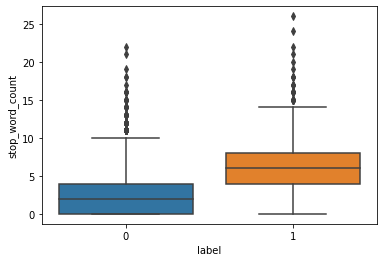

In [45]:
sns.boxplot(data["label"], data["stop_word_count"])

In [46]:
data["stop_word_count"].describe()

count    7920.000000
mean        3.448611
std         3.380061
min         0.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        26.000000
Name: stop_word_count, dtype: float64

### Replace `#` with space

In [47]:
data["tweet"] = data["tweet"].apply(lambda tweet: re.sub("#", " ", tweet))

### Replace `mention` words

In [48]:
data["tweet"] = data["tweet"].apply(lambda tweet: \
                        " ".join([word for word in tweet.split() if not word.startswith("@")]))

### Replace `URL` with space

In [49]:
data["tweet"] = data["tweet"].apply(lambda tweet: \
                                    re.sub("(?P<url>https?://[^\s]+)", " ", tweet))

### Contraction to Expansion

In [50]:
def contraction_to_expansion(tweet):
    processed_tweet = ""
    for word in tweet.split():
        if word in contractions.keys():
            processed_tweet += contractions[word]
        else:
            processed_tweet += word
        processed_tweet += " "
    return processed_tweet

In [51]:
data["tweet"] = data["tweet"].apply(contraction_to_expansion)

### Replace special symbol with space

In [52]:
data["tweet"] = data["tweet"].apply(lambda tweet: re.sub("[^\w\s]", " ", tweet))

### Remove multiple space

In [53]:
data["tweet"] = data["tweet"].apply(lambda tweet: " ".join(tweet.split()))

### Lowerize to case

In [54]:
data["tweet"] = data["tweet"].apply(lambda tweet: tweet.lower())

### Replace Stopwords

In [55]:
data["tweet"] = data["tweet"].apply(lambda tweet: \
                        " ".join([word for word in tweet.split() if not(word in STOP_WORDS)]))

### Remove numbers from tweet

In [56]:
data["tweet"] = data["tweet"].apply(lambda tweet: \
                            " ".join([word for word in tweet.split() if word.isalpha()]))

### Remove Single words

In [57]:
data["tweet"] = data["tweet"].apply(lambda tweet: \
                            " ".join([word for word in tweet.split() if len(word) > 1]))

### Sentiment Score

In [58]:
data["sentiment_score"] = data["tweet"].apply(lambda tweet: \
                                              sid.polarity_scores(tweet)["compound"])

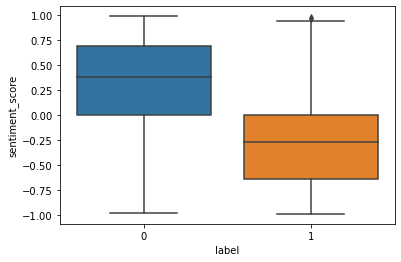

In [59]:
sns.boxplot(data["label"], data["sentiment_score"])

In [60]:
data["sentiment_score"].describe()

count    7920.000000
mean        0.161396
std         0.514171
min        -0.987300
25%        -0.153100
50%         0.128000
75%         0.624900
max         0.985800
Name: sentiment_score, dtype: float64

### Count Vectorizer

In [61]:
document_term_matrix = count_vectorizer.fit_transform(data["tweet"])

### Latent Dirichlet Allocation

In [62]:
lda.fit(document_term_matrix)

LatentDirichletAllocation(n_components=2)

In [63]:
lda_topics = pd.DataFrame(lda.transform(document_term_matrix), \
                          columns=["topic1", "topic2"])

In [64]:
data["topic_1"] = lda_topics["topic1"]
data["topic_2"] = lda_topics["topic2"]
#data["topic_3"] = lda_topics["topic3"]

### Feature Scaling

In [65]:
data.columns

Index(['tweet', 'label', 'word_count', 'charcter_count', 'hashtag_count',
       'vulgar_word_count', 'symbol_count', 'stop_word_count',
       'sentiment_score', 'topic_1', 'topic_2'],
      dtype='object')

In [66]:
scaling_features = ["word_count", "charcter_count", "hashtag_count", \
                    "symbol_count", "stop_word_count", "vulgar_word_count"]

for feature in scaling_features:
    data[feature] = standard_scaler.fit_transform(data[feature].values.reshape(-1, 1))

### Split to X and y

In [67]:
X = data.drop(columns=["label", "tweet"])
y = data["label"]

### Upsampling using SMOTE

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [70]:
score = []
for train_index, test_index in kfold.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    logistic_reg.fit(X_train, y_train)
    prediction = logistic_reg.predict(X_test)
    score.append(f1_score(y_test, prediction))

In [71]:
np.array(score).mean()

0.782563433088084

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()

In [73]:
score = []
for train_index, test_index in kfold.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    forest_model.fit(X_train, y_train)
    prediction = forest_model.predict(X_test)
    score.append(f1_score(y_test, prediction))

In [74]:
np.array(score).mean()

0.7745725623762978

### Gradient Boosting 

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost_clf = GradientBoostingClassifier()

In [76]:
score = []
for train_index, test_index in kfold.split(X):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    gradient_boost_clf.fit(X_train, y_train)
    prediction = gradient_boost_clf.predict(X_test)
    score.append(f1_score(y_test, prediction))

In [77]:
np.array(score).mean()

0.7875679716032649

In [78]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Embedding, Conv1D, Flatten, Dense, Dropout
from keras.models import Sequential

### Neural Network Model

In [79]:
nn_model = Sequential()
nn_model.add(Dense(64, activation="sigmoid"))
nn_model.add(Dense(32, activation="sigmoid"))
nn_model.add(Dense(16, activation="sigmoid"))
nn_model.add(Dense(8, activation="sigmoid"))
nn_model.add(Dense(1, activation="sigmoid"))

In [80]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [81]:
nn_model.fit(X, y, batch_size=6, epochs=5, validation_split=0.15, verbose=2)

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1122/1122 - 1s - loss: 0.3898 - accuracy: 0.8336 - val_loss: 0.2700 - val_accuracy: 0.8889
Epoch 2/5
1122/1122 - 1s - loss: 0.2785 - accuracy: 0.8834 - val_loss: 0.2550 - val_accuracy: 0.8914
Epoch 3/5
1122/1122 - 1s - loss: 0.2712 - accuracy: 0.8831 - val_loss: 0.2533 - val_accuracy: 0.8914
Epoch 4/5
1122/1122 - 1s - loss: 0.2673 - accuracy: 0.8840 - val_loss: 0.2505 - val_accuracy: 0.8880
Epoch 5/5
1122/1122 - 1s - loss: 0.2637 - accuracy: 0.8859 - val_loss: 0.2643 - val_accuracy: 0.8830


### Tfidf and Logistic Regression

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [83]:
tfidf_vector = tfidf_vectorizer.fit_transform(data["tweet"])
target = data["label"]

In [84]:
logistic_reg = LogisticRegression()
score = []
for train_index, test_index in kfold.split(tfidf_vector):
    X_train, y_train = tfidf_vector[train_index], target.iloc[train_index]
    X_test, y_test = tfidf_vector[test_index], target.iloc[test_index]
    logistic_reg.fit(X_train, y_train)
    prediction = logistic_reg.predict(X_test)
    score.append(f1_score(y_test, prediction))

In [85]:
np.array(score).mean()

0.6943016057529705

### Tfidf and RandomForest

In [86]:
forest_model = RandomForestClassifier()
score = []
for train_index, test_index in kfold.split(tfidf_vector):
    X_train, y_train = tfidf_vector[train_index], target.iloc[train_index]
    X_test, y_test = tfidf_vector[test_index], target.iloc[test_index]
    forest_model.fit(X_train, y_train)
    prediction = forest_model.predict(X_test)
    score.append(f1_score(y_test, prediction))

In [87]:
np.array(score).mean()

0.6865330068633215

### CNN Model (on text)

In [88]:
text = data["tweet"].tolist()
target = data["label"]

In [89]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

In [90]:
vocabulary_size = len(tokenizer.word_index) + 1

In [91]:
encoded_text = tokenizer.texts_to_sequences(text)

In [92]:
processed_text = pad_sequences(encoded_text, maxlen=20, padding="post")

In [93]:
model = Sequential()
model.add(Embedding(vocabulary_size, 30, input_length=20))
model.add(Dropout(0.3))
model.add(Conv1D(32, 3, activation="relu"))
model.add(Dropout(0.3))
model.add(Conv1D(16, 3, activation="relu"))
model.add(Dropout(0.3))
model.add(Conv1D(8, 3, activation="relu"))
model.add(Flatten())
model.add(Dense(units=1, activation="sigmoid"))

In [94]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [95]:
model.fit(processed_text, target, batch_size=6, epochs=5, validation_split=0.15, verbose=2)

Epoch 1/5
1122/1122 - 6s - loss: 0.3891 - accuracy: 0.8200 - val_loss: 0.2875 - val_accuracy: 0.8695
Epoch 2/5
1122/1122 - 6s - loss: 0.2444 - accuracy: 0.9121 - val_loss: 0.2740 - val_accuracy: 0.8695
Epoch 3/5
1122/1122 - 6s - loss: 0.1747 - accuracy: 0.9436 - val_loss: 0.2788 - val_accuracy: 0.8813
Epoch 4/5
1122/1122 - 6s - loss: 0.1369 - accuracy: 0.9569 - val_loss: 0.3072 - val_accuracy: 0.8763
Epoch 5/5
1122/1122 - 6s - loss: 0.1138 - accuracy: 0.9635 - val_loss: 0.3695 - val_accuracy: 0.8704


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [97]:
forest_model.fit(X_train, y_train)
prediction = forest_model.predict(X_test)
confusion_matrix(y_test, prediction)

array([[1574,  155],
       [ 135,  512]], dtype=int64)